<a href="https://colab.research.google.com/github/wikiban43/Misinformation-Analysis/blob/main/BB_intersection_MRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pickle
drive.mount('/content/drive')

path = 'drive/My Drive/MSR/ICWSM_Community_Overlap/'
path3 = 'drive/My Drive/MSR/ACM COMPASS 2023/'

#DATA READING (Following)

rting_bridge_following_CJI_MRA = pickle.load(open(path3+'bridge_users_RTing_following_data.pickle','rb'))
rtd_bridge_following_CJI_MRA = pickle.load(open(path3+'bridge_users_RTd_following_data.pickle','rb'))
s1 = set(rting_bridge_following_CJI_MRA.keys())
s2 = set(rtd_bridge_following_CJI_MRA.keys())

Mounted at /content/drive


In [ ]:
#DATA READING (MRA and CJI)
import pickle
df_mra = pickle.load(open(path+"MRA_CJI_Core_Data/df_mra_core_tweets_Jun22.pickle","rb")).reset_index()
df_mra = df_mra[['author_id','text','public_metrics']]
df_cji = pickle.load(open(path+"MRA_CJI_Core_Data/pure_cji_user_tweets.pickle","rb"))
df_cji = df_cji[['author_id','text','public_metrics']]
def get_public_met_data(x):
  return x['retweet_count']

df_mra['public_metrics.retweet_count'] = df_mra['public_metrics'].apply(lambda x:get_public_met_data(x))
df_cji['public_metrics.retweet_count'] = df_cji['public_metrics'].apply(lambda x:get_public_met_data(x))


In [ ]:
#DATA READING (BB)
path2 = 'drive/My Drive/MSR/icwsm_datasets/'#/Prop_ICWSM/'
import pandas as pd
df_BB = pd.read_csv(path2+"bollywood.csv",low_memory=False)
#df_BB = df_BB[['text', 'author_id', 'public_metrics.retweet_count','entities.mentions', 'author.username']]


users_BB = list(df_BB['author_id'].unique())
users_BB_str = [str(users_BB[i]) for i in range(0,len(users_BB))]

In [ ]:
df_BB['created_at'][100:10000]

100     2022-02-28T20:36:26.000Z
101     2022-02-28T20:36:09.000Z
102     2022-02-28T20:32:26.000Z
103     2022-02-28T20:30:54.000Z
104     2022-02-28T20:30:25.000Z
                  ...           
9995    2022-02-26T14:03:40.000Z
9996    2022-02-26T14:03:36.000Z
9997    2022-02-26T14:03:34.000Z
9998    2022-02-26T14:03:21.000Z
9999    2022-02-26T14:03:13.000Z
Name: created_at, Length: 9900, dtype: object

In [ ]:
users_with_followings = list(rting_bridge_following_CJI_MRA.keys())
users_with_followings.extend(list(rtd_bridge_following_CJI_MRA.keys()))
len(users_with_followings)

4369

In [ ]:
df_BB_g = df_BB.groupby(["author_id"]).sum(["public_metrics.retweet_count"]).reset_index()
df_BB_RT_count = df_BB[["author_id","author.username","public_metrics.retweet_count"]]
df_BB_RT_count = df_BB_RT_count.sort_values(by="public_metrics.retweet_count",ascending=False).reset_index()
df_BB_RT_count['author_id'] = df_BB_RT_count['author_id'].astype('string')

In [ ]:
import os
import pickle
#os.listdir(path)

edges_mra = pickle.load(open(path+"edges_mra.pickle","rb"))
edges_cji = pickle.load(open(path+"edges_cji.pickle","rb"))

In [ ]:
#Get the unique users in the MRA-CJI network

user_set_mracji = set()
for edge in edges_mra:
  u1 = edge[0]
  u2 = edge[1]
  user_set_mracji.add(u1)
  user_set_mracji.add(u2)

for edge in edges_cji:
  u1 = edge[0]
  u2 = edge[1]
  user_set_mracji.add(u1)
  user_set_mracji.add(u2)


len(user_set_mracji)

In [ ]:
#Find common users in MRA, CJI, and BB dataframes
common_users1 = set(users_BB_str).intersection(user_set_mracji)
len(common_users1)
common_users = common_users1

In [ ]:
df_BB_RT_count.head()

In [ ]:
df_common = df_BB_RT_count[df_BB_RT_count['author_id'].isin(common_users)].reset_index(drop=True)
df_common.loc[df_common['public_metrics.retweet_count']>=50]['author_id'].nunique()

In [ ]:
df_common.columns

In [ ]:
!pip3 install advertools

In [ ]:
#Find if BB has any hashtags from MRA-CJI

import ast
import math
import advertools as adv

def get_hashtags(l):
  temp_l=[]
  #print(type(l))
  #if math.isnan(l)==False:
  if type(l)==str:
    l = ast.literal_eval(l)
    for item in l:
      #print(item)
      temp_l.append(item["tag"].lower())
    return temp_l
  else:
    return None

df_BB["hashtags"] = df_BB["entities.hashtags"].apply(lambda x: get_hashtags(x))


cji_unique_ht = set(["notmycji", "chandrachud", "protestatun", "legalgenocide","2ndclasscitizens","wokejudg"])
mra_unique_ht = set(["ablanari", "menscommission", "niruparoy", "saveinnocentmen","fakecases_498a_dv_125_377_376_354"])

for i in range(0,df_BB.shape[0]):
  #print(df_BB["hashtags"][i])
  #print()
  try:
    if len(set(df_BB["hashtags"][i]).intersection(cji_unique_ht))>0:
      print(df_BB["hashtags"][i])
   #else:
      #print("No intersection")
  except:
    continue
#df_BB["hashtags"]



In [ ]:
def extract_hashtags_from_entities(text):
  hashtag_summary = adv.extract_hashtags(text)
  return hashtag_summary['hashtags'][0]

In [ ]:
#Find if MRA and CJI have any hashtags from BB


#df_mra["entities.hashtags"] = df_mra["text"].apply(lambda x: extract_hashtags_from_entities(x))
df_cji["entities.hashtags"] = df_cji["text"].apply(lambda x: extract_hashtags_from_entities(x))
bb_hashtags = ['#boycottbollywood', '#boycottbollywoodcompletely', '#boycottbollywood-forever', '#boycottalia', '#boycottgangubai','#bollywood','#boycott','#alia']
c=0

#df = df_mra
df = df_cji

for i in range(0,df.shape[0]):
  #print(df_mra["hashtags"][i])
  #print()
  if "bolly" in df["text"][i]:
    print(df["text"][i])
  try:
    #if "bolly" in df_mra["text"][i]:
    #  print(df_mra["text"][i])
    #  print("Before intersection, hashtags in tweet:")
    #  print(df_mra["entities.hashtags"][i])
    #  print('\n')
    if len(set(df["entities.hashtags"][i]).intersection(bb_hashtags))>0:
      print(df["entities.hashtags"][i])
      c+=1
    #else:
    #  print("No intersection")
  except:
    continue

print("Number of hashtag overlap tweets:"+str(c))

In [ ]:
#Find how many users in BB also appear in MRA-CJI set (retweet overlap: BB users tweeting/retweeting about MRA)

users_MRA = set(list(df_mra['author_id'].unique()))
users_cji = set(list(df_cji['author_id'].unique()))

#users_mra_cji = users_MRA.union(users_cji)

#print(len(users_mra_cji.intersection(users_BB_str)))
#common_users = users_mra_cji.intersection(users_BB_str)

common_users_MRA_BB = users_MRA.intersection(users_BB_str)
common_users_CJI_BB = users_cji.intersection(users_BB_str)

#Pairwise retweet overlap users
print(len(common_users_MRA_BB))
print(len(common_users_CJI_BB))

#pickle.dump(common_users_MRA_BB,open(path+"rt_overlap_users_BB_MRA.pickle","wb"))
#pickle.dump(common_users_CJI_BB,open(path+"rt_overlap_users_BB_CJI.pickle","wb"))

239
54


In [ ]:
#pickle.dump(common_users1,open(path+"rt_overlap_users_BB_MRA_CJI.pickle","wb"))

In [ ]:
#common_users = pickle.load(open(path+"rt_overlap_users_BB_MRA_CJI.pickle","rb"))

In [ ]:
def get_retweet_count(x):
  return x['retweet_count']

In [ ]:
df_mra['public_metrics.retweet_count'] = df_mra['public_metrics'].apply(lambda x: get_retweet_count(x))
df_cji['public_metrics.retweet_count'] = df_cji['public_metrics'].apply(lambda x: get_retweet_count(x))

In [ ]:
#Form a dict of BB author names and IDs
authorids_BB = list(df_BB['author_id'])
usernames_BB = list(df_BB['author.username'])
id2name = dict()
for i in range(0,len(authorids_BB)):
  id = authorids_BB[i]
  id2name[id] = usernames_BB[i]

pickle.dump(id2name,open(path3+"id2name_BB.pickle","wb"))

In [ ]:
#Form a dict of BB author names and IDs
#authorids_BB = list(df_BB['author_id'])
#usernames_BB = list(df_BB['author.username'])
#id2name = dict()
#for i in range(0,len(authorids_BB)):
#  id = authorids_BB[i]
#  id2name[id] = usernames_BB[i]


#Read the id2name dict
id2name = pickle.load(open(path3+"id2name_BB.pickle","rb"))

#Find retweet overlap user dataframes (authors are bridges)
#NOTE: HERE WE ONLY GET DETAILS OF BRIDGES (e.g. df_MRA_BB). WE DO NOT GET THEIR NAMES OR TWEETS!
def get_rt_overlap_df(df,common_users):
  print(df.columns)
  df_g = df.groupby(["author_id"])["public_metrics.retweet_count"].sum().reset_index()
  print(df_g)
  df_RT_count = df_g[["author_id","public_metrics.retweet_count"]]
  df_RT_count = df_g.sort_values(by="public_metrics.retweet_count",ascending=False).reset_index()
  df_RT_count['author_id'] = df_g['author_id'].astype('string')

  df_common = df_RT_count[df_RT_count['author_id'].isin(common_users)].reset_index(drop=True)
  df_common = df_common.loc[df_common['public_metrics.retweet_count']>=1000]
  print("Number of RT overlap users:"+str(df_common.shape[0]))
  print(df_common.columns)
  return df_common

def get_uname(author_id):
  try:
    uname = id2name[author_id]
  except:
    uname = None
  return uname

#MRA-BB overlap
df_MRA_BB = get_rt_overlap_df(df_mra,common_users_MRA_BB)
df_MRA_BB["author.username"] = df_MRA_BB["author_id"].apply(lambda x: get_uname(x))
#CJI-BB overlap
df_CJI_BB = get_rt_overlap_df(df_cji,common_users_CJI_BB)
df_CJI_BB["author.username"] = df_CJI_BB["author_id"].apply(lambda x: get_uname(x))

Index(['author_id', 'text', 'public_metrics', 'public_metrics.retweet_count'], dtype='object')
                author_id  public_metrics.retweet_count
0     1000203930914181120                          5837
1     1000419295900422145                           422
2               100160402                         27643
3               100211808                          6751
4     1002262543803469824                            87
...                   ...                           ...
1689   997824640155291648                         12873
1690   997836398030974976                           352
1691   998213347702013953                        118614
1692   999131492533063685                          1157
1693   999946112403431424                           952

[1694 rows x 2 columns]
Number of RT overlap users:190
Index(['index', 'author_id', 'public_metrics.retweet_count'], dtype='object')
Index(['author_id', 'text', 'public_metrics', 'public_metrics.retweet_count'], dtype='object')
    

In [ ]:
df_MRA_BB.head()

,index,author_id,public_metrics.retweet_count,author.username
0,391,1000203930914181120,1075790,None
1,977,1003036784710713344,314269,None
2,1344,1003843509692977152,269723,None
3,751,1005687262548357120,269600,None
4,745,1010907061255852032,222580,None


In [ ]:
#Not required as of now (filtering on RT count)
#df_common = df_RT_count[df_RT_count['author_id'].isin(common_users)].reset_index(drop=True)
#df_common = df_common.loc[df_common['public_metrics.retweet_count']>=1000]
#df_common.reset_index(inplace = True)
#df_common.shape

## Getting the number of politicians (Nivaduck members) in the MRA-CJI-BB overlap

In [ ]:
import pandas as pd
path2 = 'drive/My Drive/MSR/ACM COMPASS 2023/'
df_pol = pd.read_excel(path2+"politicians.xlsx")

def get_party(user,arg='name'):
  if arg == 'name':
    try:
      party = df_pol.loc[df_pol['username']==user]['party']
    except:
      party = None
  elif arg == 'id':
    try:
      party = df_pol.loc[df_pol['id_str']==user]['party']
    except:
      party = None

  return party


In [ ]:
df_pol.head()

,Unnamed: 0,index,id_str,name,username,followers,following,tweets,party
0,0,5959,18839785,Narendra Modi,narendramodi,82434690,2448,34007,BJP
1,3,9856,1447949844,Amit Shah,AmitShah,30653586,311,17453,BJP
2,4,8157,405427035,Arvind Kejriwal,ArvindKejriwal,26371739,222,33467,AAP
3,5,5960,1346439824,Rajnath Singh,rajnathsingh,22841645,536,10800,BJP
4,6,5962,3437532637,Yogi Adityanath,myogiadityanath,21660293,50,18459,BJP


# Getting the RTing and RTed people of bridge users

In [ ]:
#Get RTed user names
def get_RTed_account(tweet):
  #print("#")
  #print(tweet)
  if tweet[0:2] == "RT":
    tweet_l = tweet.split(': ')
    #try:
    #print(tweet_l)
    rted_username = tweet_l[0].split(' ')[1].replace('@','')
    #except:
    #  print(tweet_l[0])
    #print(rted_username)
    return rted_username

#Convert author field to string for all dfs
df_BB['author_id'] = df_BB['author_id'].astype(str)
df_cji['author_id'] = df_cji['author_id'].astype(str)
df_mra['author_id'] = df_mra['author_id'].astype(str)




#Filter dfs on bridge users (MRA-BB)
df_BB_MRA_bridges_in_BB = df_BB.loc[df_BB['author_id'].isin(list(df_MRA_BB['author_id']))]
df_BB_MRA_bridges_in_MRA = df_mra.loc[df_mra['author_id'].isin(list(df_MRA_BB['author_id']))]
#Filter dfs on bridge users (CJI-BB)
df_BB_CJI_bridges_in_BB = df_BB.loc[df_BB['author_id'].isin(list(df_CJI_BB['author_id']))]
df_BB_CJI_bridges_in_CJI = df_cji.loc[df_cji['author_id'].isin(list(df_CJI_BB['author_id']))]

#Get the retweeted users in each dataframe (here, the authors are bridges.)
df_BB_MRA_bridges_in_BB["retweeted_username"] = df_BB["text"].apply(lambda x: get_RTed_account(x))
df_BB_MRA_bridges_in_MRA["retweeted_username"] = df_cji["text"].apply(lambda x: get_RTed_account(x))
df_BB_CJI_bridges_in_BB["retweeted_username"] = df_mra["text"].apply(lambda x: get_RTed_account(x))
df_BB_CJI_bridges_in_CJI["retweeted_username"] = df_mra["text"].apply(lambda x: get_RTed_account(x))




#get_RTed_account(df_BB["text"][1])
#df_BB.head()

df_BB_MRA_bridges = pd.concat([df_BB_MRA_bridges_in_BB,df_BB_MRA_bridges_in_MRA],axis=0)
df_BB_CJI_bridges = pd.concat([df_BB_CJI_bridges_in_BB,df_BB_CJI_bridges_in_CJI],axis=0)
df_BB_MRA_bridges = df_BB_MRA_bridges[['author_id','author.username','text','public_metrics.retweet_count','retweeted_username']]
df_BB_CJI_bridges = df_BB_CJI_bridges[['author_id','author.username','text','public_metrics.retweet_count','retweeted_username']]
#AGAIN NO NEED! GET RETWEETED INFORMATION FROM HERE.
pickle.dump(df_BB_MRA_bridges,open(path3+"df_BB_MRA_bridges.pickle","wb"))
pickle.dump(df_BB_CJI_bridges,open(path3+"df_BB_CJI_bridges.pickle","wb"))

In [ ]:
df_BB_MRA_bridges = pd.concat([df_BB_MRA_bridges_in_BB,df_BB_MRA_bridges_in_MRA],axis=0)
df_BB_CJI_bridges = pd.concat([df_BB_CJI_bridges_in_BB,df_BB_CJI_bridges_in_CJI],axis=0)
#Get the political alignment based on membership of rewteeted users in Nivaduck
df_BB_MRA_bridges['retweeted_user_party'] = df_BB_MRA_bridges['retweeted_username'].apply(lambda x:get_party(x))
df_BB_CJI_bridges['retweeted_user_party'] = df_BB_CJI_bridges['retweeted_username'].apply(lambda x:get_party(x))



In [ ]:
#############################################
#NO NEED TO RUN PREVIOUS CODE. RUN FROM HERE.
#HERE WE GET BRIDGE TWEETS AND NAMES AS WELL.
#############################################
#pickle.dump(df_BB_MRA_bridges,open(path2+"BB_MRA_bridges.pickle","wb"))
#pickle.dump(df_BB_CJI_bridges,open(path2+"BB_CJI_bridges.pickle","wb"))
import pickle

df_BB_MRA_bridges = pickle.load(open(path3+"BB_MRA_bridges.pickle","rb"))
df_BB_CJI_bridges = pickle.load(open(path3+"BB_CJI_bridges.pickle","rb"))

In [ ]:
df_BB_MRA_bridges['author_id'].nunique()

190

In [ ]:
#Check how many retweeted users by the bridges have ID information in BB data
import pickle
id2name = pickle.load(open(path3+"id2name_BB.pickle","rb"))

name2id = dict()
for key in id2name.keys():
  name2id[id2name[key]] = str(key)
#Set of user IDs in following data
s = s1.union(s2)

def get_following_data_avl_rted_name(username):
  #Find the ID of the rted username
  try:
    rted_id = name2id[username]
  except:
    rted_id = None
  #Check if the rted_id is in the following data
  if rted_id not in s:
    rted_id = None
  return rted_id

df_BB_MRA_bridges['retweeted_userid'] = df_BB_MRA_bridges['retweeted_username'].apply(lambda x: get_following_data_avl_rted_name(x))
df_BB_CJI_bridges['retweeted_userid'] = df_BB_CJI_bridges['retweeted_username'].apply(lambda x: get_following_data_avl_rted_name(x))

s3 = set(df_BB_MRA_bridges['retweeted_username'].unique())
s4 = set(df_BB_CJI_bridges['retweeted_username'].unique())



#s5 = set()
#for username in s3.union(s4):
#  try:
#    id = name2id[username]
#    s5.add(id)
#  except:
#    continue

#print("Number of retweeted users whose ID could be found:")
#print(len(s5))
#print("Number of retweeted users present in following data:")
#len(s5.intersection(s))
#len(s5.intersection(s))

In [ ]:
type(list(s5)[0])

In [ ]:
s = s1.union(s2)
len(s.intersection(s4))
len(s4)

1324

In [ ]:
#Get Rting users (kind of does the same thing as above function:- dunno why I wrote it!)
def get_rting_users(entities):
  if entities!=None and type(entities)==dict:
    #print(entities)
    if 'mentions' in entities.keys():
      #print(entities['mentions'][0]['username'])
      return entities['mentions'][0]['username']
  return None

#Get RTed user names
def get_RTed_account(tweet):
  #print("#")
  #print(tweet)
  if tweet[0:2] == "RT":
    tweet_l = tweet.split(': ')
    #try:
    #print(tweet_l)
    rted_username = tweet_l[0].split(' ')[1].replace('@','')
    #except:
    #  print(tweet_l[0])
    #print(rted_username)
    return rted_username

#Getting the retweeted users in the dfs
df_BB["retweeted_username"] = df_BB["text"].apply(lambda x: get_RTed_account(x))
df_cji["retweeted_username"] = df_cji["text"].apply(lambda x: get_RTed_account(x))
df_mra["retweeted_username"] = df_mra["text"].apply(lambda x: get_RTed_account(x))

#Filter on those retweeted users who are bridges (here, the authors are not bridges. They retweet bridges.)
df_BB_authors_rting_BB_MRA_bridges = df_BB.loc[df_BB['retweeted_username'].isin(list(df_BB_MRA_bridges['author.username'].unique()))]
df_CJI_authors_rting_BB_MRA_bridges = df_cji.loc[df_cji['retweeted_username'].isin(list(df_BB_MRA_bridges['author.username'].unique()))]
df_MRA_authors_rting_BB_MRA_bridges = df_mra.loc[df_mra['retweeted_username'].isin(list(df_BB_MRA_bridges['author.username'].unique()))]

df_BB_authors_rting_BB_CJI_bridges = df_BB.loc[df_BB['retweeted_username'].isin(list(df_BB_CJI_bridges['author.username'].unique()))]
df_CJI_authors_rting_BB_CJI_bridges = df_cji.loc[df_cji['retweeted_username'].isin(list(df_BB_CJI_bridges['author.username'].unique()))]
df_MRA_authors_rting_BB_CJI_bridges = df_mra.loc[df_mra['retweeted_username'].isin(list(df_BB_CJI_bridges['author.username'].unique()))]

#type(df_mra['entities'][0].keys())

In [ ]:
df_CJI_authors_rting_BB_CJI_bridges.head()

,author_id,text,public_metrics,retweeted_username,public_metrics.retweet_count
21,1532419410094333952,RT @right2men: @rashtrapatibhvn Please remove ...,"{'retweet_count': 21, 'reply_count': 0, 'like_...",right2men,21
186,1551350142175186944,RT @ImJohnnyDepp005: #JudiciaryMustApologize f...,"{'retweet_count': 287, 'reply_count': 0, 'like...",ImJohnnyDepp005,287
224,1522771221208776707,RT @right2men: @rashtrapatibhvn Please remove ...,"{'retweet_count': 21, 'reply_count': 0, 'like_...",right2men,21
242,790809757397426176,RT @right2men: @rashtrapatibhvn Please remove ...,"{'retweet_count': 21, 'reply_count': 0, 'like_...",right2men,21
380,102969077,RT @right2men: @rashtrapatibhvn Please remove ...,"{'retweet_count': 21, 'reply_count': 0, 'like_...",right2men,21


In [ ]:
pickle.dump(df_BB_authors_rting_BB_MRA_bridges,open(path3+"df_BB_authors_rting_BB_MRA_bridges.pickle","wb"))
pickle.dump(df_CJI_authors_rting_BB_MRA_bridges,open(path3+"df_CJI_authors_rting_BB_MRA_bridges.pickle","wb"))
pickle.dump(df_MRA_authors_rting_BB_MRA_bridges,open(path3+"df_MRA_authors_rting_BB_MRA_bridges.pickle","wb"))

In [ ]:
pickle.dump(df_BB_authors_rting_BB_CJI_bridges,open(path3+"df_BB_authors_rting_BB_CJI_bridges.pickle","wb"))
pickle.dump(df_CJI_authors_rting_BB_CJI_bridges,open(path3+"df_CJI_authors_rting_BB_CJI_bridges.pickle","wb"))
pickle.dump(df_MRA_authors_rting_BB_CJI_bridges,open(path3+"df_MRA_authors_rting_BB_CJI_bridges.pickle","wb"))

In [ ]:
###################################################################
#Again run from here. No need to run complete code for RTing users.
###################################################################
import pickle
df_BB_authors_rting_BB_MRA_bridges = pickle.load(open(path3+"df_BB_authors_rting_BB_MRA_bridges.pickle","rb"))
df_CJI_authors_rting_BB_MRA_bridges = pickle.load(open(path3+"df_CJI_authors_rting_BB_MRA_bridges.pickle","rb"))
df_MRA_authors_rting_BB_MRA_bridges = pickle.load(open(path3+"df_MRA_authors_rting_BB_MRA_bridges.pickle","rb"))

df_BB_authors_rting_BB_CJI_bridges = pickle.load(open(path3+"df_BB_authors_rting_BB_CJI_bridges.pickle","rb"))
df_CJI_authors_rting_BB_CJI_bridges = pickle.load(open(path3+"df_CJI_authors_rting_BB_CJI_bridges.pickle","rb"))
df_MRA_authors_rting_BB_CJI_bridges = pickle.load(open(path3+"df_MRA_authors_rting_BB_CJI_bridges.pickle","rb"))

#Get unique authors RTing bridges
sa = set(df_BB_authors_rting_BB_MRA_bridges['author_id'].unique())
sb = sa.union(set(df_CJI_authors_rting_BB_MRA_bridges['author_id'].unique()))
sc = sb.union(set(df_MRA_authors_rting_BB_MRA_bridges['author_id'].unique()))
sd = sc.union(set(df_BB_authors_rting_BB_CJI_bridges['author_id'].unique()))
se = sd.union(set(df_CJI_authors_rting_BB_CJI_bridges['author_id'].unique()))
sf = se.union(set(df_MRA_authors_rting_BB_CJI_bridges['author_id'].unique()))

s = s1.union(s2)
#Find how many of them have ID information in BB data
#len(sf.intersection(set(id2name.keys())))
print("Number of RTing authors present in following data:")
len(sf.intersection(s))

In [ ]:
def reduce_columns(df):
  return df[['author_id','text','retweeted_username']]
#Get reduced dfs for authors retweeting bridges
df_BB_authors_rting_BB_MRA_bridges = reduce_columns(df_BB_authors_rting_BB_MRA_bridges)
df_CJI_authors_rting_BB_MRA_bridges = reduce_columns(df_CJI_authors_rting_BB_MRA_bridges)
df_MRA_authors_rting_BB_MRA_bridges = reduce_columns(df_MRA_authors_rting_BB_MRA_bridges)

df_BB_authors_rting_BB_CJI_bridges = reduce_columns(df_BB_authors_rting_BB_CJI_bridges)
df_CJI_authors_rting_BB_CJI_bridges = reduce_columns(df_CJI_authors_rting_BB_CJI_bridges)
df_MRA_authors_rting_BB_CJI_bridges = reduce_columns(df_MRA_authors_rting_BB_CJI_bridges)

df_authors_rting_BB_MRA_bridges = pd.concat([df_BB_authors_rting_BB_MRA_bridges,df_CJI_authors_rting_BB_MRA_bridges,df_MRA_authors_rting_BB_MRA_bridges],axis=0)
df_authors_rting_BB_CJI_bridges = pd.concat([df_BB_authors_rting_BB_CJI_bridges,df_CJI_authors_rting_BB_CJI_bridges,df_MRA_authors_rting_BB_CJI_bridges],axis=0)


In [ ]:
#AGAIN, NO NEED! START FROM HERE FOR RTING USER DETAILS
pickle.dump(df_authors_rting_BB_MRA_bridges,open(path3+"df_authors_rting_BB_MRA_bridges.pickle","wb"))
pickle.dump(df_authors_rting_BB_CJI_bridges,open(path3+"df_authors_rting_BB_CJI_bridges.pickle","wb"))

In [ ]:
'''
bridge_rted_BB_tweeters = list(df_BB.loc[df_BB['author_id'].isin(list(df_common['author_id'].unique()))]['retweeted_username'].unique())  #RTed users in BB rted by bridges
bridge_rted_CJI_tweeters = list(df_BB.loc[df_BB['author_id'].isin(list(df_common['author_id'].unique()))]['retweeted_username'].unique())  #RTed users in CJI rted by bridges
bridge_rted_MRA_tweeters = list(df_BB.loc[df_BB['author_id'].isin(list(df_common['author_id'].unique()))]['retweeted_username'].unique())  #RTed users in MRA rted by bridges
'''

## JOIN RTING AND RTED DETAILS AND GET COMBINED BRIDGE NETWORK INFO

In [ ]:
import pickle
#Get RTed user network neighborhood
df_BB_MRA_bridges = pickle.load(open(path3+"df_BB_MRA_bridges.pickle","rb"))
df_BB_CJI_bridges = pickle.load(open(path3+"df_BB_CJI_bridges.pickle","rb"))
#Get RTing user network neighborhood
df_authors_rting_BB_MRA_bridges = pickle.load(open(path3+"df_authors_rting_BB_MRA_bridges.pickle","rb"))
df_authors_rting_BB_CJI_bridges = pickle.load(open(path3+"df_authors_rting_BB_CJI_bridges.pickle","rb"))

In [ ]:
#BB-MRA Neighborhood
bb_mra_nn = df_BB_MRA_bridges.merge(df_authors_rting_BB_MRA_bridges,left_on='author.username',right_on='retweeted_username')
#BB-CJI Neighborhood
bb_cji_nn = df_BB_CJI_bridges.merge(df_authors_rting_BB_CJI_bridges,left_on='author.username',right_on='retweeted_username')
bb_cji_nn['author.username'].nunique()

41

In [ ]:
#Here we get the list of parties for each bridge's followings

import pandas as pd
path2 = 'drive/My Drive/MSR/ACM COMPASS 2023/'
df_pol = pd.read_excel(path2+"politicians.xlsx")
#df_fol.drop_duplicates(inplace=True)
id2party = dict(zip(df_pol.id_str, df_pol.party))
name2party = dict(zip(df_pol.username, df_pol.party))
'''
def get_party(user,arg='name'):
  if arg == 'name':
    try:
      party = list(df_pol.loc[df_pol['username']==user].party)[0]
    except:
      party = None
  elif arg == 'id':
    try:
      party = list(df_pol.loc[df_pol['id_str']==user].party)[0]
    except:
      party = None

  return party
'''
import pandas as pd
#Get user id to following dfs
def get_user_following_df(rting_bridge_following_CJI_MRA):
  userid_l = []
  following_name_l = []
  following_id_l = []
  c=0
  for key in rting_bridge_following_CJI_MRA.keys():
    try:
      #rting_bridge_following_CJI_MRA[key].columns)
      following_name_l.append(list(rting_bridge_following_CJI_MRA[key]['username'].unique()))
      following_id_l.append(list(rting_bridge_following_CJI_MRA[key]['id'].unique()))
      userid_l.append(key)
      c+=1
      print(c)
    except:
      continue
  df_userid_following = pd.DataFrame()
  df_userid_following['user']=userid_l
  df_userid_following['following_name'] = following_name_l
  df_userid_following['following_id'] = following_id_l

  return df_userid_following


df_fol1 = get_user_following_df(rting_bridge_following_CJI_MRA)
df_fol2 = get_user_following_df(rtd_bridge_following_CJI_MRA)

df_fol = pd.concat([df_fol1,df_fol2],axis=0)
print(df_fol.head())

#Get the parties for each list of followings in the df. Returns a list of parties as well.
def get_following_parties(l):
  #party_l = [get_party(id) for id in l]
  #print(type(l[0]))
  party_l = []
  for id in l:
    if id in name2party.keys():
      party_l.append(str(name2party[id]))
  return party_l

df_fol["party_list"] = df_fol["following_name"].apply(lambda x: get_following_parties(x))


In [ ]:
bjp_alliance = set(['bjp','npp','ajsup','aiadmk','ainrc','agp','hspdp','ham','ipft','jjp','ljp','mgp','npf','nda','ndpp','ss','skm','udp','uppl',
'bdjs','gnlf','hlp','ijk','imkmk','jss','jsp','kkc','np','pjp','pnk','pt','rljd','rljp','rsp','sad','vhp','rpi'])
#bjp_alliance = set(['bjp','vhp'])

In [ ]:
df_fol.reset_index(inplace=True)
df_fol['user'] = df_fol['user'].astype(int)

#type(df_fol['user'][0])

In [ ]:
import pickle
id2name = pickle.load(open(path3+"id2name_BB.pickle","rb"))
name2id = dict()
for key in id2name.keys():
  name2id[id2name[key]] = str(key)

#Given a list of parties (for followings of user) and bjp alliance list, find the number of parties in the alliance
def get_polarity(following_polarity_list,bjp_alliance):
  bjp_fol = 0
  opp_fol = 0
  #print(following_polarity_list)
  #print(bjp_alliance)
  for item in following_polarity_list:
    if item.lower() in bjp_alliance:
      bjp_fol+=1
    else:
      opp_fol+=1
  return (bjp_fol,opp_fol)


def get_majority_following_polarity(user):
  #If username exists in Nivaduck, directly take the party (NEEDS TO BE REMOVED)
  #if str(user) in name2party.keys():
  #  party_list = [name2party[str(user)]]
  #If user ID exists in Nivaduck, directly take the party (NEEDS TO BE REMOVED)
  #elif int(user) in id2party.keys():
  #  party_list = [id2party[int(user)]]
  #Else, get the parties of the followings
  #else:
  #Since df_fol could not be deduplicated due to presence of lists in its entries, we used this method of selecting the first entry
  try:
    party_list = list(df_fol.loc[df_fol['user']==int(user)]['party_list'])[0]
  except:
    return (0,0),'X'

  #print(party_list)
  #print(bjp_alliance)
  if len(party_list)>0:
    (bjp_fol,opp_fol) = get_polarity(party_list,bjp_alliance)
  else:
    return (0,0),'X'
  if bjp_fol>opp_fol:
    return (bjp_fol,opp_fol),"R"
  elif opp_fol>bjp_fol:
    return (bjp_fol,opp_fol),"L"
  else:
    return (bjp_fol,opp_fol),"X"


#For a bridge node, get all polarity triplets, i.e., for all rting and rted nodes of that bridge.
def get_polarity_triplet(df,node):
  #HERE, BASICALLY INSTEAD OF RETURNING THE LIST OF ALL TRIPLETS FOR A BRIDGE, YOU NEED TO RETURN ONE
  #TRIPLET, WHICH GIVES THE POLARITY OF THE ENTIRE RTING AND RTED NEIGHORHOOD FOR THAT BRIDGE BASED ON
  #THE TOTAL BJP AND OPP FOL COUNT OF THE NEIGHBORHOOD

  #Find the df part that contains that bridge's info
  df = df.drop_duplicates()
  df = df.loc[df['author_id_x']==node].reset_index()
  #Get the polarity of the bridge (either through itself or through its followings)
  _,bridge_polarity = get_majority_following_polarity(node)
  #All triplets for this bridge
  #triplets_for_this_bridge = []

  bjp_fol_rting=0
  opp_fol_rting=0
  bjp_fol_rted=0
  opp_fol_rted=0

  #For each row in that bridge's df
  for i in range(0,df.shape[0]):
    #Get the rting and rted user
    rting_user = df['author_id_y'][i]
    rted_user = df['retweeted_username_x'][i]
    #Get the rting and rted user polarities
    if rting_user!=None:
      (bjp_fol,opp_fol),rting_polarity = get_majority_following_polarity(rting_user)
      bjp_fol_rting+=bjp_fol
      opp_fol_rting+=opp_fol
    if rted_user!=None:
      if rted_user in name2id.keys():
        (bjp_fol,opp_fol),rted_polarity = get_majority_following_polarity(name2id[rted_user])
        bjp_fol_rted+=bjp_fol
        opp_fol_rted+=opp_fol
      else:
        #print("Could not find user ID.")
        continue

  if bjp_fol_rting>opp_fol_rting:
    LHS_polarity='R'
  elif bjp_fol_rting<opp_fol_rting:
    LHS_polarity='L'
  else:
    LHS_polarity='X'

  if bjp_fol_rted>opp_fol_rted:
    RHS_polarity='R'
  elif bjp_fol_rted<opp_fol_rted:
    RHS_polarity='L'
  else:
    RHS_polarity='X'

  triplet = LHS_polarity+bridge_polarity+RHS_polarity
    #Append the rting, bridge, and rted polarity in the final list and return it
    #try:
    #  triplets_for_this_bridge.append(rting_polarity+bridge_polarity+rted_polarity)
    #except:
    #  triplets_for_this_bridge.append('XXX')
  #return (bjp_fol,opp_fol),triplets_for_this_bridge
  return triplet
#Method to get RRR, RLR, etc. triplets and their percentage
def get_nn_polarity_triplets_dict(df,field):
  triplet_dict = dict()
  #c=0
  #List of all bjp_fol and opp_fol counts for each bridge, to be used for significance testing
  significance_test_list = []
  for bridge in df[field].unique():
    print("Finding triplets for bridge:"+bridge)
    #(bjp_fol,opp_fol),triplets = get_polarity_triplet(df,bridge)
    triplet = get_polarity_triplet(df,bridge)
    #if bjp_fol!=-1 and opp_fol!=-1:
    #  significance_test_list.append((bjp_fol,opp_fol))

    #rting_polarity = get_polarity (df,bridge.rting)
    #rted_polarity = get_polarity(df,bridhe.rted)

    #for triplet in triplets:
    if triplet not in triplet_dict.keys():
      triplet_dict[triplet]=1
    else:
      triplet_dict[triplet]+=1

    #break
    #c+=1
  #print(triplet_dict)
    #if(c>5):
    #  break
  #print(significance_test_list)
  return triplet_dict

triplet_dict = get_nn_polarity_triplets_dict(bb_mra_nn,"author_id_x")
#triplet_dict = get_nn_polarity_triplets_dict(bb_cji_nn,"author_id_x")

print(triplet_dict)



In [ ]:
triplet_dict = pickle.load(open(path3+'triplet_dict_bb_cji_v2.pickle','rb'))
triplet_dict = pickle.load(open(path3+'triplet_dict_bb_mra.pickle_v2','rb'))
#Count of bridges with left wing and right wing neighborhood
left = 0
right = 0
for key in triplet_dict:
  if key[0]=='L' or key[2]=='L':
    left+=triplet_dict[key]
  elif key[0]=='R' or key[2]=='R':
    right+=triplet_dict[key]

print("Left: "+str(left))
print("Right: "+str(right))

Left: 77
Right: 45


In [ ]:
for key in triplet_dict

{'LXX': 3,
 'RLL': 10,
 'RRX': 8,
 'LXL': 9,
 'XXX': 3,
 'RRL': 24,
 'RXR': 6,
 'RLR': 11,
 'XXR': 1,
 'LLR': 3,
 'LRL': 4,
 'LLL': 7,
 'RXX': 2,
 'RXL': 9,
 'XRR': 1,
 'RRR': 10,
 'XRX': 1,
 'LXR': 2,
 'RLX': 6,
 'LRR': 3,
 'LLX': 2,
 'LRX': 1}

In [ ]:
#pickle.dump(triplet_dict,open(path3+'triplet_dict_bb_mra.pickle_v2','wb'))
#pickle.dump(triplet_dict,open(path3+'triplet_dict_bb_cji_v2.pickle','wb'))

In [ ]:
df_fol.loc[df_fol['user']==190607413]

,index,user,following_name,following_id,party_list


In [ ]:
list(df_pol.loc[df_pol['username']=='ArvindKejriwal'].party)[0]

'AAP'

## Get BB-MRA/BB-CJI RT Network (to be used for IM)

In [ ]:
#############################################
#NO NEED TO RUN PREVIOUS CODE. RUN FROM HERE.
#HERE WE GET BRIDGE TWEETS AND NAMES AS WELL.
#############################################
#pickle.dump(df_BB_MRA_bridges,open(path2+"BB_MRA_bridges.pickle","wb"))
#pickle.dump(df_BB_CJI_bridges,open(path2+"BB_CJI_bridges.pickle","wb"))
import pickle

df_BB_MRA_bridges = pickle.load(open(path3+"BB_MRA_bridges.pickle","rb"))
df_BB_CJI_bridges = pickle.load(open(path3+"BB_CJI_bridges.pickle","rb"))

In [ ]:
df_cji = pickle.load(open(path+"MRA_CJI_Core_Data/pure_cji_user_tweets.pickle","rb"))
df_cji = df_cji[['author_id','text','public_metrics']]

In [ ]:
path2 = 'drive/My Drive/MSR/icwsm_datasets/'#/Prop_ICWSM/'
import pandas as pd
df_BB = pd.read_csv(path2+"bollywood.csv",low_memory=False)


In [ ]:
#Get the entire network of BB, MRA, and CJI on which influence of bridges is to be calculated
df_BB = df_BB[['author_id','text']]
#df_mra = df_mra[['author_id','text']]
df_cji = df_cji[['author_id','text']]

df_BB['author_id'] = df_BB['author_id'].astype(str)
#df_mra['author_id'] = df_mra['author_id'].astype(str)
df_cji['author_id'] = df_cji['author_id'].astype(str)

#df_BB_MRA = pd.concat([df_BB,df_mra],axis=0).reset_index()
df_BB_CJI = pd.concat([df_BB,df_cji],axis=0).reset_index()

In [ ]:
#METHOD TO GET RETWEET NETWORK FROM ANY DF
def get_RTed_account(tweet):
  #print("#")
  #print(tweet)
  if tweet[0:2] == "RT":
    tweet_l = tweet.split(': ')
    #try:
    #print(tweet_l)
    rted_username = tweet_l[0].split(' ')[1].replace('@','')
    #except:
    #  print(tweet_l[0])
    #print(rted_username)
    return rted_username

def get_network(df):
  username_l = list(df["author_id"].unique())
  #Get the retweeted users
  if "text" in df.columns:
    df["retweeted_user"] = df["text"].apply(lambda x: get_RTed_account(x))

  #Get all retweet edges using Soham's data (A,B would mean A retweets B)
  #edges = []
  df['edges'] = list(zip(df["author_id"], df["retweeted_user"]))
  #Unique edges (unweighted graph)
  edges = df['edges']

  #Get only the within group edges for network analysis
  #relevant_edges = []
  #for edge in edges:
  #  if edge[0] in username_l and edge[1] in username_l:
  #    relevant_edges.append(edge)
  #edges = relevant_edges

  #Weighted graph if needed
  #weight_dict = get_edges_with_weights(df['edges'].to_list())
  #dump_csv_for_community_detection(weight_dict)

  #Remove duplicate edges for unweighted graph
  edges = set(edges)
  #print("Number of unique edges: "+str(len(edges)))
  #print("\n")
  if len(edges) == 0:
    print("No retweet edges found!")
    return None
  #Get the RT network between core users (one edge only between a pair of users even if there are multiple RTs between them)
  # generate generic network graph instance
  #nx_graph = nx.DiGraph()
  #for edge in edges:#[0:1000]:
  #  #print(edges_dict[edge])
  #  try:
  #    nx_graph.add_edge(edge[0],edge[1])
  #  except:
  #    continue
  return edges


#Get the retweet network (list of edges) for BB-MRA and BB-CJI dfs

#rt_nw_BB_MRA = get_network(df_BB_MRA)
rt_nw_BB_CJI = get_network(df_BB_CJI)

In [ ]:
pickle.dump(rt_nw_BB_MRA,open(path3+'rt_nw_BB_MRA.pickle','wb'))
pickle.dump(rt_nw_BB_CJI,open(path3+'rt_nw_BB_CJI.pickle','wb'))

In [ ]:
#See how many of the influential nodes are bridges (run after running IM.ipynb)
#df_BB_MRA_bridges['author_id'] = df_BB_MRA_bridges['author_id'].astype(str)
#bridges = list(df_BB_MRA_bridges['author_id'].unique())
#bridges.extend(list(df_BB_MRA_bridges['author.username'].unique()))


df_BB_CJI_bridges['author_id'] = df_BB_CJI_bridges['author_id'].astype(str)
bridges = list(df_BB_CJI_bridges['author_id'].unique())
bridges.extend(list(df_BB_CJI_bridges['author.username'].unique()))

#seed = pickle.load(open(path3+"seed_nodes_BB_MRA_"+str(15)+".pickle","rb"))
for i in range(5,100,5):
  try:
    seed = pickle.load(open(path3+"/latest_IM_data/"+"seed_nodes_BB_CJI_"+str(i)+".pickle","rb"))
    seed = list(seed)
    seed = set([str(i) for i in seed])

    bridges = set(bridges)

    #seed.intersection(bridges)
    print(i,len(list(seed.intersection(bridges)))/len(list(seed)))
  except:
    continue



5 0.0
15 0.13333333333333333
25 0.16
35 0.11428571428571428
45 0.13333333333333333
55 0.16363636363636364
65 0.15384615384615385
75 0.14666666666666667
85 0.12941176470588237
95 0.12631578947368421


In [ ]:
bridges

{'10869322',
 '1111309063470628864',
 '1158282766213099520',
 '1167316385938042880',
 '1208459842475528192',
 '1242397358123442176',
 '1279227682480443393',
 '1283035878546341895',
 '1301017405108387842',
 '1326895861083885568',
 '1332210533651476480',
 '1351926845470478336',
 '1353002306363559941',
 '1367685458172387333',
 '1368571124657905669',
 '1385927764146941958',
 '1394648416899145730',
 '1395237485291077635',
 '1397167550421602309',
 '1401091452956864512',
 '1401140058296487937',
 '1403226692932407299',
 '1406552911560294401',
 '140855572',
 '1410535149578584066',
 '1422330473594855425',
 '1432631797389553667',
 '1433132925504000002',
 '1436724597752156167',
 '1451136870654509059',
 '1456988586729820160',
 '1461640490411982851',
 '1465666767817101317',
 '1466468672269168641',
 '1468956347274186768',
 '1478678382296526849',
 '1483440450405289985',
 '1506298235446460416',
 '154117568',
 '156590261',
 '189890404',
 '198607238',
 '211761546',
 '2487493004',
 '295520176',
 '30019925

In [ ]:
df_BB['author_id'].nunique()

NameError: ignored

In [ ]:
seed = pickle.load(open(path3+"seed_nodes_BB_CJI_"+str(95)+".pickle","rb"))
seed

{'1003843509692977152',
 '1005687262548357120',
 '1048813746024411136',
 '1084072288780238848',
 '1085544859400880128',
 '1093486206795608065',
 '1146467397827780608',
 '1180440574060445696',
 '1210810922723205120',
 '1214658974',
 '1222606118062440448',
 '1225837352074891264',
 '1227954110843904000',
 '1269627323399180288',
 '1278558357905793025',
 '1285923369313959936',
 '1286129318628929536',
 '1286789753032126465',
 '1291044587222364161',
 '1291192890937335809',
 '1292363635042336773',
 '1293495291996327936',
 '1294928401212379137',
 '1300391388744282112',
 '1300570380407418880',
 '1303216855100928000',
 '1303219762609098752',
 '1306051249008123906',
 '1307024271248560128',
 '1313710745217974272',
 '1314489390924623872',
 '1314942943396990978',
 '1316057933164228620',
 '1322786626624319489',
 '1340055256453971969',
 '1343109962667413504',
 '1344821826959110144',
 '1344859679877332995',
 '1350674022661451776',
 '1359910048151969801',
 '1361636579240935427',
 '1364981724480856065',
 

In [ ]:
df_cji == df_mra

,author_id,text
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
609165,True,True
609166,True,True
609167,True,True
609168,True,True


## Get wordclouds for BB-MRA and BB-CJI data

In [ ]:
!pip3 install wordcloud

In [ ]:
#############################################
#NO NEED TO RUN PREVIOUS CODE. RUN FROM HERE.
#HERE WE GET BRIDGE TWEETS AND NAMES AS WELL.
#############################################
#pickle.dump(df_BB_MRA_bridges,open(path2+"BB_MRA_bridges.pickle","wb"))
#pickle.dump(df_BB_CJI_bridges,open(path2+"BB_CJI_bridges.pickle","wb"))
import pickle

df_BB_MRA_bridges = pickle.load(open(path3+"BB_MRA_bridges.pickle","rb"))
df_BB_CJI_bridges = pickle.load(open(path3+"BB_CJI_bridges.pickle","rb"))

In [ ]:
#Since there are too few tweets on BB from the bridge nodes, we are sampling the data for class balance
import pandas as pd
df_BB_MRA_bridges = df_BB_MRA_bridges.reset_index(drop=True)
df_BB_MRA_bridges1 = df_BB_MRA_bridges.loc[(df_BB_MRA_bridges['text'].str.lower().str.contains('boycottbollywood'))|(df_BB_MRA_bridges['text'].str.lower().str.contains('bollywood'))].sample(n=200)
df_BB_MRA_bridges2 = df_BB_MRA_bridges.loc[(df_BB_MRA_bridges['text'].str.lower().str.contains('marriagestrike'))|(df_BB_MRA_bridges['text'].str.lower().str.contains('boycottmarriage'))].sample(n=200)
df_BB_MRA_bridges = pd.concat([df_BB_MRA_bridges1,df_BB_MRA_bridges2],axis=0)

df_BB_CJI_bridges = df_BB_CJI_bridges.reset_index(drop=True)
df_BB_CJI_bridges1 = df_BB_CJI_bridges.loc[(df_BB_CJI_bridges['text'].str.lower().str.contains('kashmir'))|(df_BB_CJI_bridges['text'].str.lower().str.contains('boycottbollywood'))|(df_BB_CJI_bridges['text'].str.lower().str.contains('bollywood'))].sample(n=200)
df_BB_CJI_bridges2 = df_BB_CJI_bridges.loc[(df_BB_CJI_bridges['text'].str.lower().str.contains('notmycji'))|(df_BB_CJI_bridges['text'].str.lower().str.contains('judiciarymustapologize'))|(df_BB_CJI_bridges['text'].str.lower().str.contains('genderbiasedlaw'))].sample(n=200)
df_BB_CJI_bridges = pd.concat([df_BB_CJI_bridges1,df_BB_CJI_bridges2],axis=0)

In [ ]:
#df_BB_CJI_bridges.loc[(df_BB_CJI_bridges['text'].str.contains('kashmir'))|(df_BB_CJI_bridges['text'].str.contains('boycottbollywood'))|(df_BB_CJI_bridges['text'].str.contains('bollywood'))]
#df_BB_MRA_bridges.loc[(df_BB_MRA_bridges['text'].str.lower().str.contains('boycottbollywood'))|(df_BB_MRA_bridges['text'].str.lower().str.contains('bollywood'))]

In [ ]:
path2 = 'drive/My Drive/MSR/ACM COMPASS 2023/'
df_pol = pd.read_excel(path2+"politicians.xlsx")

NameError: ignored

In [ ]:
'kirenrijiju' in df_pol['username'].str.lower().unique()

True

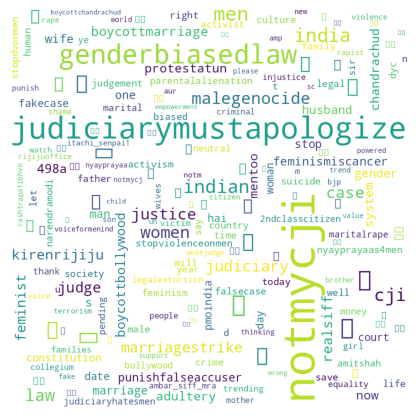

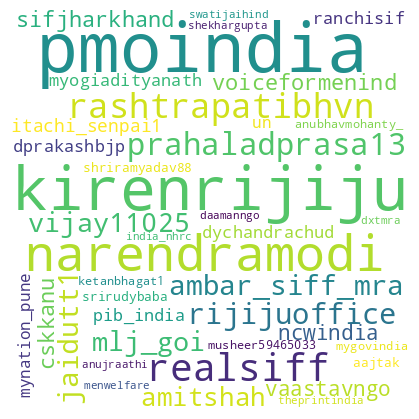

In [ ]:
# importing all necessary modules
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
path2 = 'drive/My Drive/MSR/ACM COMPASS 2023/'
df_pol = pd.read_excel(path2+"politicians.xlsx")


def get_wordcloud_string(df):
  #try:
  df = df.reset_index(drop=True)
  #except:
  #  print("DF already indexed.")
  string = ''
  string_mentions = ' '
  for i in range(0,df.shape[0]):
    #print(df['text'][i])
    #print(df)
    text = df['text'][i].lower()
    try:
      text2 = text.split(':')[1]
    except:
      text2 = text
    #print('%%%')
    #print(text2)
    text_set = set(text2.split(' '))
    mentions_l=[]
    #Get the mentions for this tweet
    for word in list(text_set):
      if len(word)>0:
        if word[0]=='@':
          mention = word[1:len(word)]
          #print("Searching:")
          #print(mention.lower())
          #if mention.lower() in df_pol['username'].str.lower().unique():
          mentions_l.append(mention)


    text_set = text_set.difference(STOPWORDS)
    string+=' '.join(list(text_set))
    string_mentions+=' '.join(mentions_l)
    #print(text_set)
    #break
  string = ' '.join(list(set(string.split(' '))))
  string = string.replace('//t.co/',' ')
  string = string.replace('https',' ')
  string = string.replace('http',' ')
  return string,string_mentions

#string = get_wordcloud_string(df_BB_MRA_bridges)
string,string_mentions = get_wordcloud_string(df_BB_CJI_bridges)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10,collocations=False).generate(string)

# plot the WordCloud image
plt.figure(figsize = (4, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

wordcloud = WordCloud(width = 400, height = 400,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10,collocations=False).generate(string_mentions)

# plot the WordCloud image
plt.figure(figsize = (4, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)



In [ ]:
df_BB_CJI_bridges = df_BB_CJI_bridges.reset_index(drop=True)

In [ ]:
import pandas as pd
#df_BB_MRA_bridges.loc[df_BB_MRA_bridges['text'].str.contains('men')].shape

#df_BB_MRA_bridges.columns
# Convert the date to datetime64
df_BB_MRA_bridges['created_at'] = pd.to_datetime(df_BB_MRA_bridges['created_at'], format='%Y-%m-%d').dt.date
#df_BB_MRA_bridges = df_BB_MRA_bridges.query("created_at >= '2021-11-01'and created_at < '2021-11-31'")
df_BB_MRA_bridges = df_BB_MRA_bridges.loc[(df_BB_MRA_bridges['created_at'] > datetime.strptime('2021-11-01', '%Y-%m-%d').date()) & (df_BB_MRA_bridges['created_at'] < datetime.strptime('2021-11-30', '%Y-%m-%d').date())]
#type(df_BB_MRA_bridges['created_at'][0])
df_BB_MRA_bridges.tail()

NameError: ignored

In [ ]:
from datetime import datetime
datetime.strptime('2021-11-30', '%Y-%m-%d').date()#()